# Tarea 1
## Reconocimiento de Patrones en Minería de Datos

### Introducción
presente informe presenta el desarrollo y los resultados del análisis de Clustering sobre un dataset de Reviews de cervezas. Para esto se debió procesar previamente los datos para un manejo óptimo sobre las gráficas y los algoritmos en sí.

### Librerías

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn

In [60]:
np.set_printoptions(threshold=np.nan)

### Lectura de los Datos

In [47]:
import pandas as pd
data = pd.read_csv('beer_reviews.csv', sep =',', header = 0)

In [63]:
data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
5,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,1075,Caldera Brewing Company,1318991115,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,1075,Caldera Brewing Company,1306276018,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,1075,Caldera Brewing Company,1290454503,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,1075,Caldera Brewing Company,1285632924,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159


In [68]:
print (data.brewery_name.unique().shape)
print (data.beer_style.unique().shape)

(5743,)
(104,)


### Selección de Datos

In [3]:
data_matrix = pd.read_csv('beer_reviews.csv', sep =',', header = 0, usecols=[#'review_overall',
                                                                             'review_aroma', 'review_appearance', 
                                                                             'review_palate', 'review_taste']).as_matrix()

### Descripción de los datos

El dataset "beer_reviews.csv" tiene 1586614 registros y 13 columnas, de las cuales sólo se utilizarán las siguientes:
* Nota general (overall)
* Nota de aroma
* Nota de apariencia
* Nota de gusto (palate)
* Nota de sabor 

### Disminución de dimensionalidad
Al seleccionar 5 columnas, se dice que se tienen 5 dimensiones para cada entrada, por lo que debido a la llamada *curse of dimensionality* se complica demasiado el cálculo. Para poder solucionar esto, se debe disminuir la dimensionalidad de los datos. 
Para disminuir las dimensiones se pueden realizar diversos métodos, y para este caso se utilizará la reducción por PCA.
#### Principal Component Analysis (PCA).
Este método reduce la dimensionalidad de los datos a través del cálculo de la proyección de estos sobre una dimensionalidad menor. Para el cálculo de la proyección PCA utiliza el cálculo de <i> Single Value Decomposition </i> o SVD, el cual descompone la matriz a reducir en matrices de vectores y valores regidos por los <i> EigenValues </i> o Autovalores, los que representan caracteristicas de la matriz.

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components = 2)
pca.fit(data_matrix)
x = pca.components_[0]
y = pca.components_[1]

data_trans = pca.transform(data_matrix)

In [6]:
colormap = np.array(['b','r','g','y','c', 'm','k','#345678'])


X = []
Y = []
for i in range(len(data_trans)):
    X.append(data_trans[i,0])
    Y.append(data_trans[i,1])

In [11]:
K_Muestra =10000
data_muestra = data_trans[0:K_Muestra,0:K_Muestra]
X_m = X[0:K_Muestra]
Y_m = Y[0:K_Muestra]

In [23]:
data_final = data_muestra

## Algoritmos de Clustering
### K-Means
El proceso de Clustering llamado K-Means es el cual donde se ubica una cantidad de centroides ya conocidos, entre iteración e iteración estos se van reposicionando y adaptando el espacio que estos abarcan. Este proceso es útil cuando la muestra posee un comportamiento cercano a grupos con forma circular, debido a la idea de aglomeramiento de datos.

In [12]:
from sklearn.cluster import KMeans

In [69]:
k_means = KMeans(init="random", n_clusters=5, n_init=5)
k_means.fit(data_final)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_


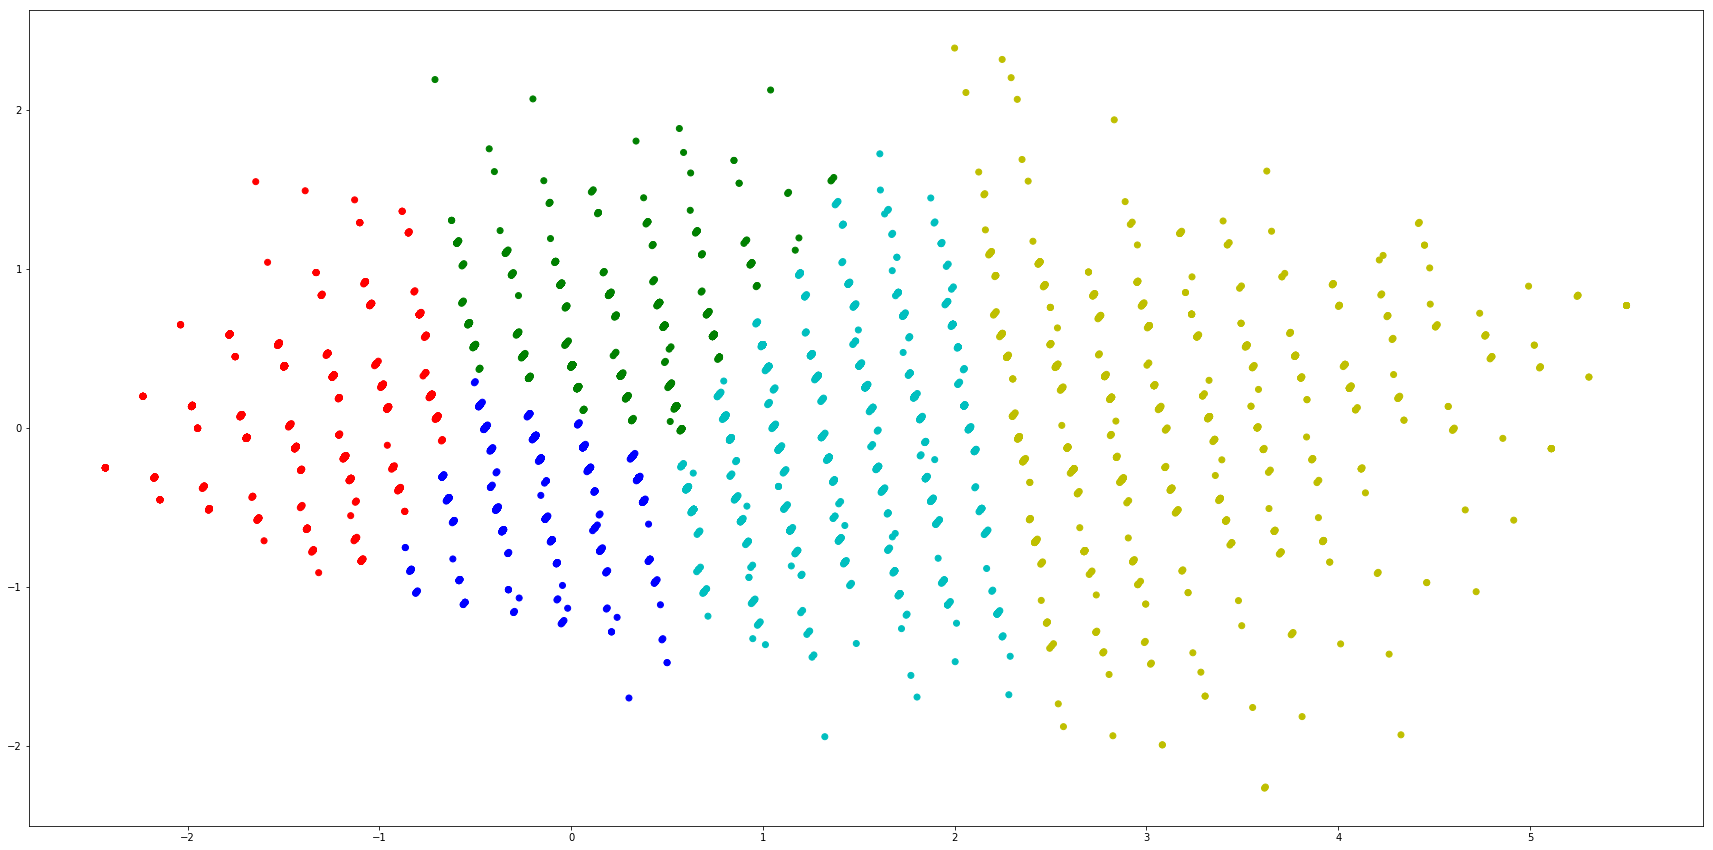

In [70]:
plt.figure(figsize=(30,15))
plot = plt.scatter(X_m,Y_m,c= colormap[k_means_labels] )

plt.show()



### MiniBatch K-Means
A diferencia de K-Means, MiniBatch no trabaja directamente con todos los datos, sino que utiliza una muestra inicial a la que le aplica el algoritmo de clustering. Luedo de la primera iteración agrega más datos a la muestra y corre de nuevo el algoritmo, de modo que va redistribuyendo entre los centroides ya posicionados, generando pequeños cambios.

In [15]:
from sklearn.cluster import MiniBatchKMeans

In [71]:
MBk_means = MiniBatchKMeans(init="random", n_clusters=5, n_init=5, batch_size=100)
MBk_means.fit(data_final)
MBk_means_labels = MBk_means.labels_

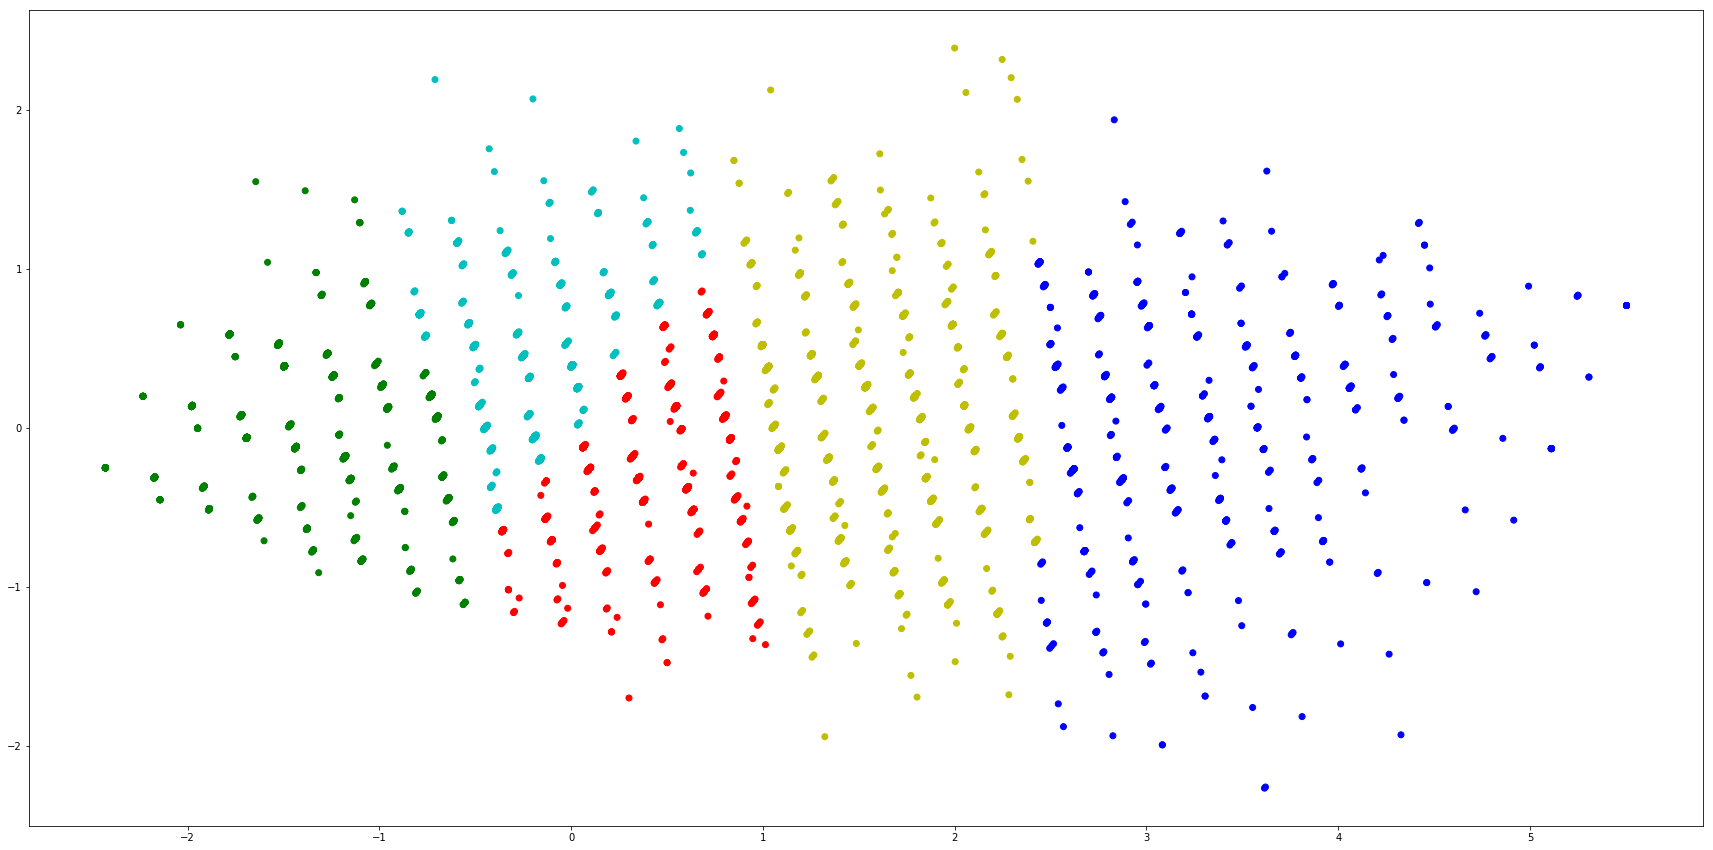

In [72]:
plt.figure(figsize=(30,15))
plot = plt.scatter(X_m,Y_m,c= colormap[MBk_means_labels] )

plt.show()

### HAC Completo
Hierarchical Aglomerative Clustering o HAC, genera cluster uniendo clusters de menor tamaño, partiendo desde clusters de un elemento, para luego así unirlos según el criterio elegido. Tres criterios para esto pueden ser Ward, complete o average. 

In [26]:
from sklearn.cluster import AgglomerativeClustering as AC

In [73]:
HAC_clustering = AC(linkage="complete", n_clusters=5)
HAC_clustering.fit(data_final)
HAC_labels = HAC_clustering.labels_

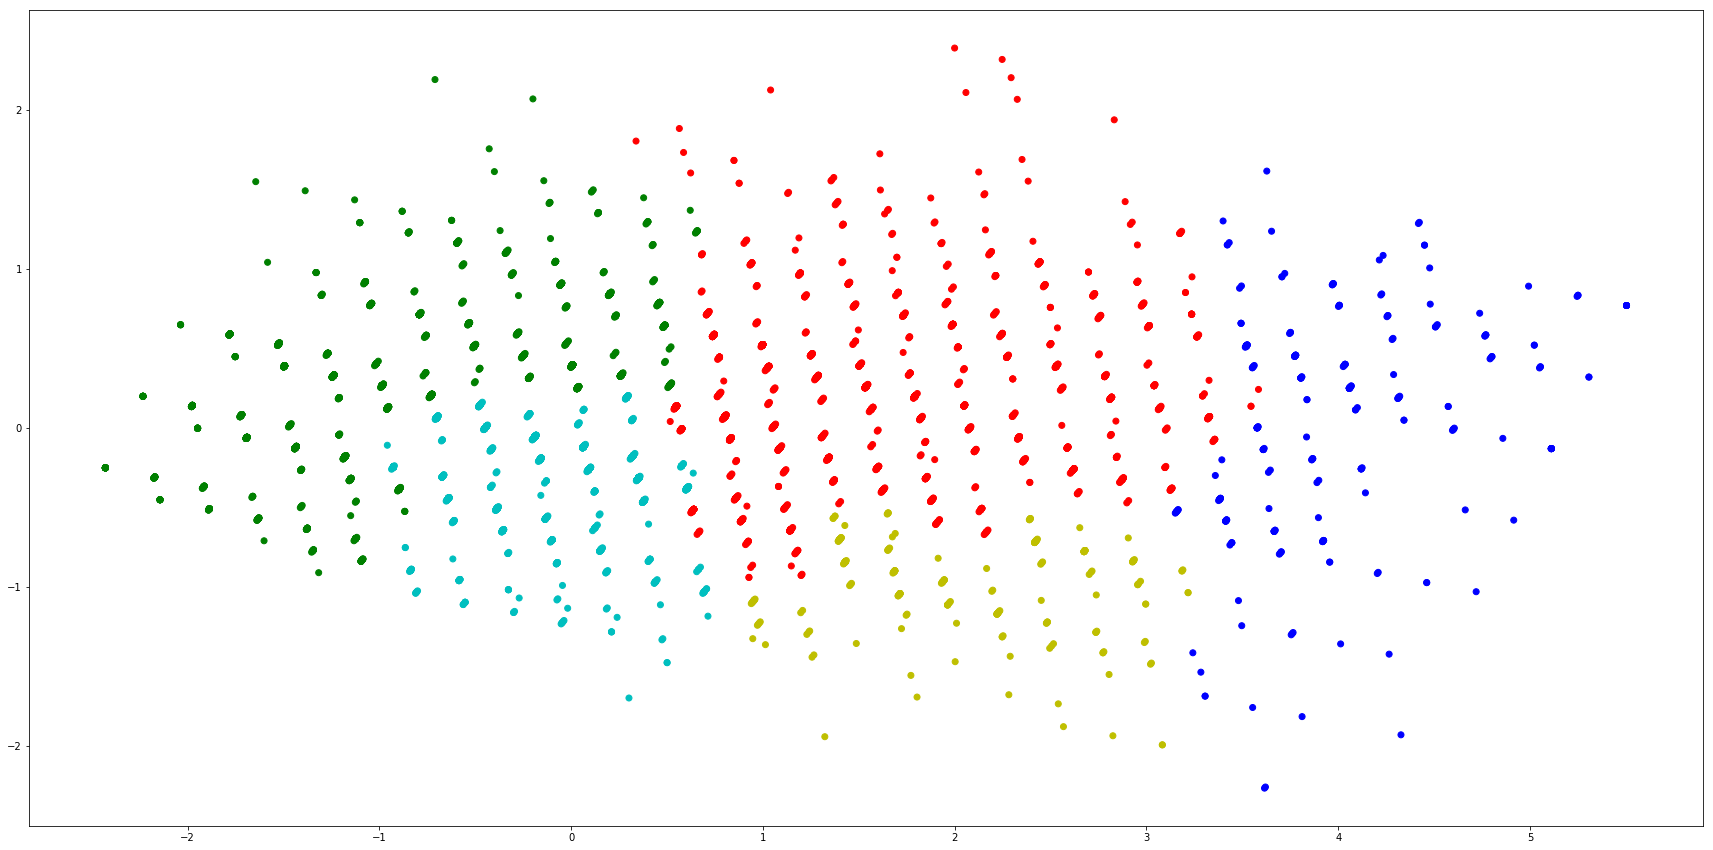

In [74]:
plt.figure(figsize=(30,15))
plot = plt.scatter(X_m,Y_m,c= colormap[HAC_labels] )

plt.show()

### Ward


Para este algoritmo también se usa AgglomerativeClustering, pero al inicializar, en lugar de usar la configuración *complete* se utiliza *ward*. También es necesario generar el grafo de conectividad entre los datos usando *kneighbors_graph*. Luego el grafo de conectividad se convierte en simétrico y finalmente se ajusta un modelo con el algoritmo ward usando el grafo de vecinos que ya fue calculado.

In [22]:
from sklearn.neighbors import kneighbors_graph

In [44]:
connectivity = kneighbors_graph(data_final, n_neighbors=400, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [79]:
ward = AC(n_clusters=5, linkage='ward', connectivity=connectivity)
ward.fit(data_final)
ward_labels = ward.labels_

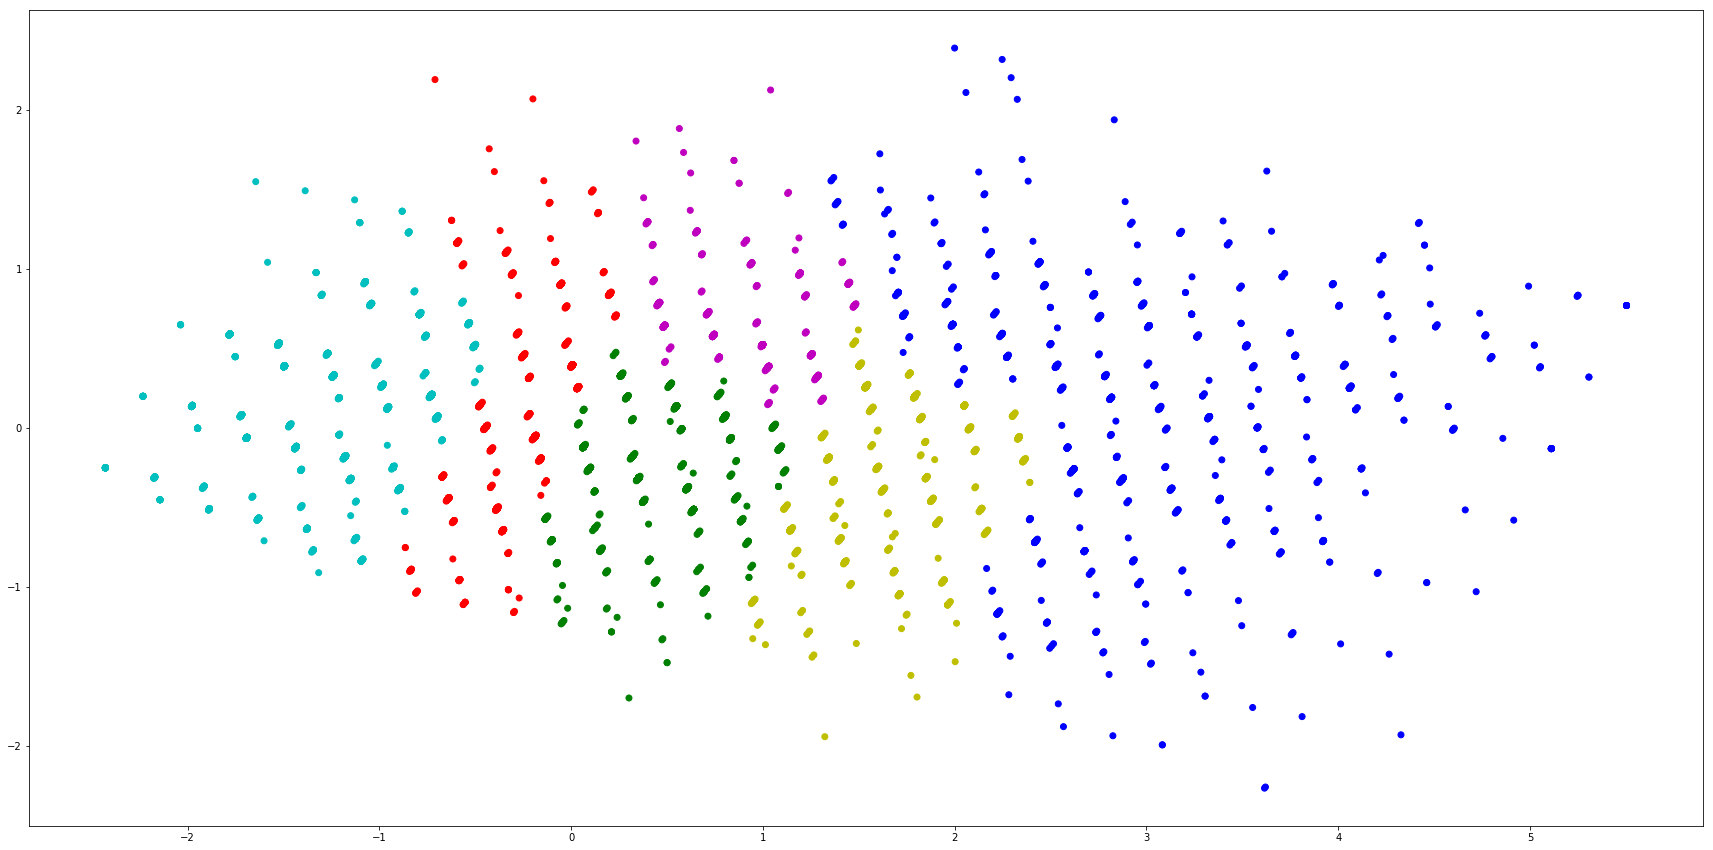

In [78]:
plt.figure(figsize=(30,15))
plot = plt.scatter(X_m,Y_m,c= colormap[ward_labels] )

plt.show()

### DBSCAN

In [41]:
from sklearn.cluster import DBSCAN

In [90]:
DBSCAN_cluster = DBSCAN(eps=0.7, min_samples = 10)
DBSCAN_cluster.fit(data_final)
DBSCAN_labels = DBSCAN_cluster.labels_

### nunca terminó de ejecutarse este algoritmo, me da miedo volver a ejecutarlo

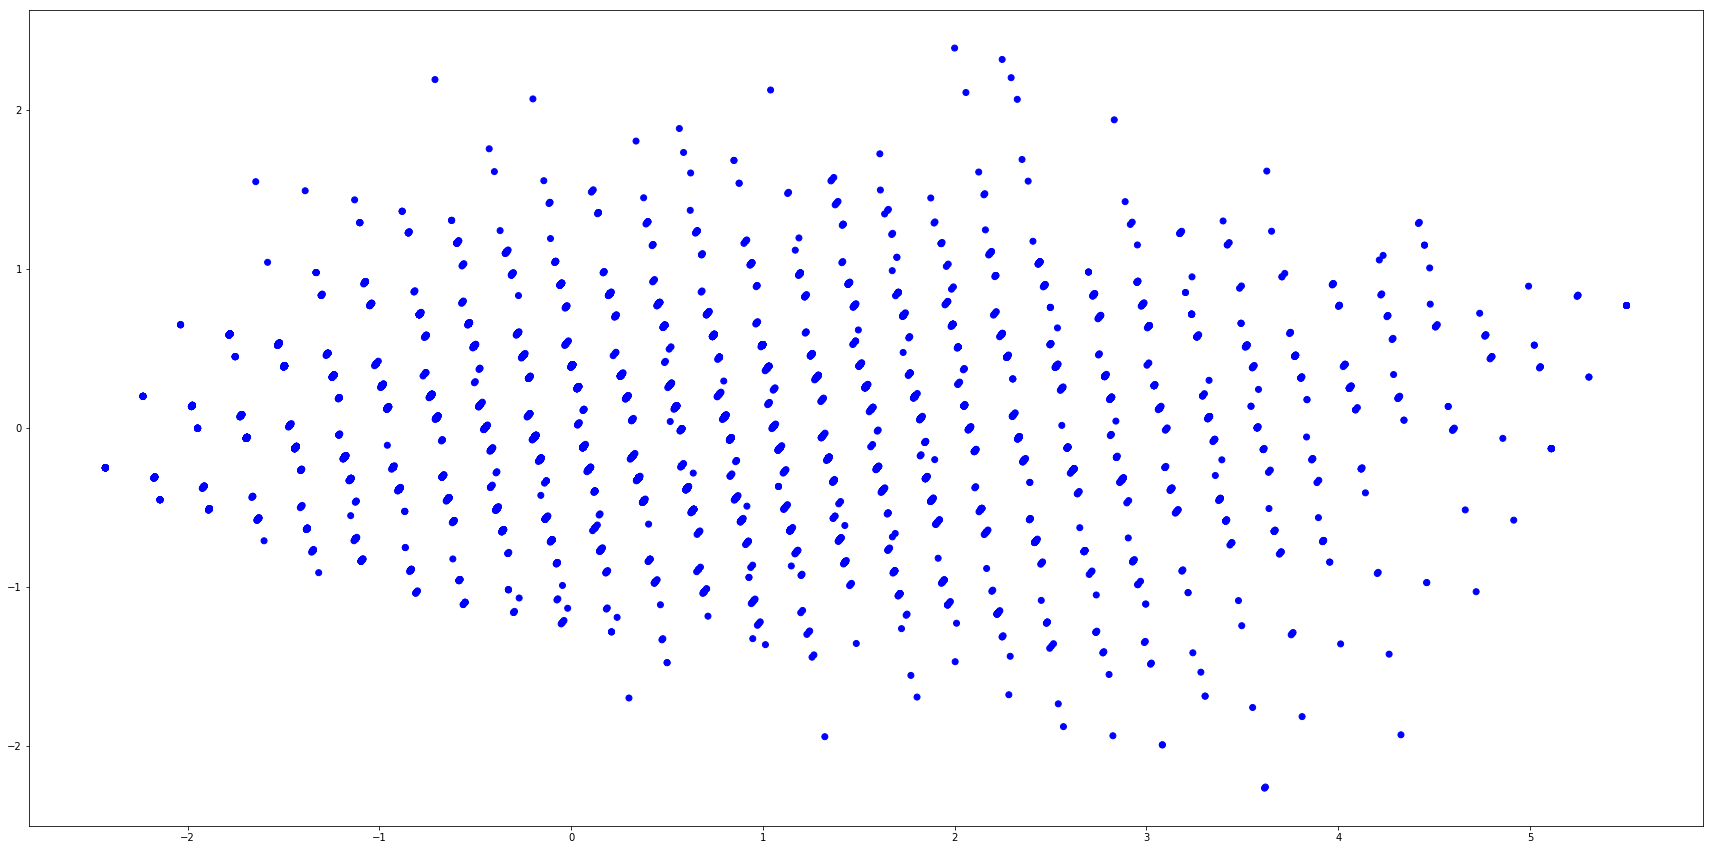

In [91]:
plt.figure(figsize=(30,15))
plot = plt.scatter(X_m,Y_m,c= colormap[DBSCAN_labels] )

plt.show()

## Respuestas